In [1]:
import pandas as pd
import numpy as np
import time

In [267]:
df = pd.read_csv('beer_review_ave_BAscrape_reviews.csv')
df = df.dropna()
df

C:\Users\chris\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Unnamed: 0.1,beer_beerid,beer_name,brewery_name,beer_style,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,brewery_name_simple,reviews
4,4,4,7,Purple Haze,Abita Brewing Co.,Fruit / Vegetable Beer,3.0,1.201470e+09,3.266313,3.179059,3.251138,3.106980,3.101669,4.2,Abita,frankdatank1337 from California3.58/5 rDev +7...
7,7,7,10,Allagash Dubbel Ale,Allagash Brewing Company,Dubbel,4.0,1.183002e+09,3.826360,3.746862,3.937936,3.743375,3.767782,7.0,Allagash,SaisonMaker from Massachusetts4.75/5 rDev +24...
8,8,8,11,Bert Grant's Scottish Ale,Yakima Brewing Co. / Bert Grant's Ales,Scottish Ale,5.0,1.074705e+09,3.394118,3.388235,3.500000,3.235294,3.270588,4.7,Yakima / Bert Grant's Ales,rodbeermunch from Nevada3.04/5 rDev -8.4%look...
9,9,9,12,Bert Grant's Imperial Stout,Yakima Brewing Co. / Bert Grant's Ales,Russian Imperial Stout,5.0,1.091938e+09,3.709302,3.767442,4.075581,3.534884,3.686047,6.0,Yakima / Bert Grant's Ales,HardTarget from Texas3.68/5 rDev -2.4%look: 4...
11,11,11,14,Witkap Pater Singel / Stimulo,Brouwerij Slaghmuylder,Belgian Pale Ale,6.0,1.174668e+09,3.875000,3.727500,3.892500,3.692500,3.695000,6.0,Brouwerij Slaghmuylder,JonnoWillsteed from England3.54/5 rDev -5.9%l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37464,37464,37464,45383,Brass Parachute Barleywine,Third Street Aleworks,English Barleywine,3776.0,1.224100e+09,4.500000,4.000000,4.000000,4.000000,4.500000,9.6,Third Street Aleworks,CJNAPS from California4.56/5 rDev +8.8%look: ...
37467,37467,37467,45386,Peace Keeper,Porterhouse Restaurant & Brew Pub,Baltic Porter,2263.0,1.224109e+09,3.500000,3.500000,4.000000,3.000000,3.000000,6.0,Porterhouse Restaurant & Brew Pub,AltBock from Ohio3.28/5 rDev 0%look: 4 | smel...
37469,37469,37469,45388,Island Monkeys,Mersea Island Brewery,English Porter,13699.0,1.224115e+09,4.500000,4.000000,4.000000,4.500000,4.000000,4.5,Mersea Island Brewery,sleazo from New York4.15/5 rDev 0%look: 4 | s...
37476,37476,37476,45398,Duke's Big Ass Bock,The Wheat Beer Company,Weizenbock,4335.0,1.264378e+09,1.250000,2.750000,3.000000,1.500000,1.250000,6.8,The Wheat Beer Company,stevoj from Idaho2.27/5 rDev +13.5%look: 2.75...


In [3]:
print(df.columns)
df

Index(['Unnamed: 0', 'Unnamed: 0.1', 'beer_name', 'beer_style',
       'review_overall', 'review_aroma', 'review_appearance', 'review_palate',
       'review_taste', 'beer_abv', 'brewery_name_simple', 'reviews', 'ibu'],
      dtype='object')


,Unnamed: 0,Unnamed: 0.1,beer_name,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,brewery_name_simple,reviews,ibu
2,2,139,Alimony Ale,American IPA,3.484848,3.469697,3.732323,3.515152,3.479798,6.8,Buffalo Bill's Brewery,GuyFawkes from Illinois2.88/5 rDev -16.3%look...,80.0
3,3,179,Snake Dog IPA,American IPA,3.620283,3.573585,3.741038,3.507547,3.506604,7.1,Flying Dog Brewery,Jason from Massachusetts3.53/5 rDev -1.4%look...,80.0
4,4,353,Wolaver's India Pale Ale,American IPA,3.663424,3.466926,3.784047,3.568093,3.550584,6.5,Otter Creek / Wolaver's,rodbeermunch from Nevada3.09/5 rDev -13.7%loo...,80.0
5,5,357,ACME California IPA,American IPA,3.780612,3.553061,3.837755,3.694898,3.686735,6.5,North Coast,Steve555 from Wales3.67/5 rDev +0.8%look: 3.5...,80.0
6,6,539,Hop Ottin' IPA,American IPA,4.007656,4.002871,4.110526,3.950239,4.047847,7.0,Anderson Valley,BerkeleyBeerSleuth from California4.08/5 rDev...,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,393,28489,India Pale Ale,American IPA,3.846154,3.846154,4.038462,3.769231,3.653846,6.2,The Defiant,JonAdams from New York4.28/5 rDev +10%look: 4...,66.0
399,399,28811,Just Outstanding IPA,American IPA,4.280303,4.257576,4.230303,4.125758,4.213636,6.8,Kern River,Arjen from Netherlands3.5/5 rDev -17.1%look: ...,65.0
411,411,29536,Centennial IPA,American IPA,4.500000,4.000000,4.500000,4.500000,4.500000,6.5,John S. Rhodell Brewery,"BWHD from Illinois4.25/5 rDev 0%Sep 21, 2012",53.0
412,412,29567,Bombay IPA,American IPA,4.400000,4.400000,4.100000,4.200000,4.500000,6.5,Draught House Pub & Brewery,redraider2323 from Texas4.37/5 rDev +8.4%look...,58.0


In [269]:
simple_df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
simple_df['reviews']=simple_df['reviews'].astype('str')
simple_df = simple_df.dropna()
simple_df = simple_df[simple_df.beer_style.str.contains('American IPA',case=False)]
# simple_df_ipa.to_csv('ipa.csv')
simple_df

,beer_beerid,beer_name,brewery_name,beer_style,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,brewery_name_simple,reviews
19,23,Wachusett IPA (India Pale Ale),Wachusett Brewing Company,American IPA,20.0,1.171276e+09,3.971631,3.734043,3.829787,3.765957,3.858156,5.6,Wachusett,stakem from Pennsylvania3.02/5 rDev -18.2%loo...
103,120,Pick Axe IPA,Tommyknocker Brewery,American IPA,156.0,1.197428e+09,3.578740,3.635827,3.665354,3.437008,3.529528,6.2,Tommyknocker Brewery,donspublic from Texas3.56/5 rDev +1.7%look: 3...
139,158,Alimony Ale,Buffalo Bill's Brewery,American IPA,205.0,1.285315e+09,3.484848,3.469697,3.732323,3.515152,3.479798,6.8,Buffalo Bill's Brewery,GuyFawkes from Illinois2.88/5 rDev -16.3%look...
179,205,Snake Dog IPA,Flying Dog Brewery,American IPA,68.0,1.204294e+09,3.620283,3.573585,3.741038,3.507547,3.506604,7.1,Flying Dog Brewery,Jason from Massachusetts3.53/5 rDev -1.4%look...
353,399,Wolaver's India Pale Ale,Otter Creek Brewing / Wolaver's,American IPA,119.0,1.163262e+09,3.663424,3.466926,3.784047,3.568093,3.550584,6.5,Otter Creek / Wolaver's,rodbeermunch from Nevada3.09/5 rDev -13.7%loo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,45115,555 IPA,The Livery,American IPA,12547.0,1.229479e+09,4.250000,4.000000,4.000000,3.750000,3.750000,6.5,The Livery,Gigantis from Michigan3.75/5 rDev -4.6%look: ...
37277,45171,Nuggets,The Alchemist Pub & Brewery,American IPA,8227.0,1.226869e+09,4.333333,4.166667,4.000000,4.166667,4.000000,7.8,The Alchemist Pub & Brewery,thekevlarkid from Maryland3.81/5 rDev -7.5%lo...
37310,45210,Stone Wet Hopped IPA,Stone Brewing Co.,American IPA,147.0,1.223405e+09,4.000000,4.000000,4.000000,3.833333,3.833333,6.9,Stone,opwog from Minnesota3.41/5 rDev -15%look: 4 |...
37329,45229,Hop Patootie,Beach Chalet Brewery and Restaurant,American IPA,882.0,1.225955e+09,4.250000,2.750000,3.500000,3.750000,4.250000,5.2,Beach Chalet Brewery and Restaurant,magictrokini from California3.3/5 rDev -13.2%...


In [270]:
#used to clean the data
import re
#Natural Language toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

#initialize blank list
corpus=[]


for ind in simple_df.index:  
    #get review for current index
    text=simple_df['reviews'][ind]
    print(type(text))
    review = re.sub('[^a-zA-Z]', ' ',text)  
    # convert to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # this will take the main stem of each work to simplify
    ps = PorterStemmer()  
      
    # get root word of each word unless it is a stopword     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create array of clean text  
    corpus.append(review)
simple_df['simple_review']=corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [285]:
beer_df = simple_df.drop(columns=['reviews'])
beer_df.to_csv('ipa.csv')
beer_df = beer_df.reset_index()
beer_df

,index,beer_beerid,beer_name,brewery_name,beer_style,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,brewery_name_simple,simple_review
0,19,23,Wachusett IPA (India Pale Ale),Wachusett Brewing Company,American IPA,20.0,1.171276e+09,3.971631,3.734043,3.829787,3.765957,3.858156,5.6,Wachusett,stakem pennsylvania rdev look smell tast feel ...
1,103,120,Pick Axe IPA,Tommyknocker Brewery,American IPA,156.0,1.197428e+09,3.578740,3.635827,3.665354,3.437008,3.529528,6.2,Tommyknocker Brewery,donspubl texa rdev look smell tast feel overal...
2,139,158,Alimony Ale,Buffalo Bill's Brewery,American IPA,205.0,1.285315e+09,3.484848,3.469697,3.732323,3.515152,3.479798,6.8,Buffalo Bill's Brewery,guyfawk illinoi rdev look smell tast feel over...
3,179,205,Snake Dog IPA,Flying Dog Brewery,American IPA,68.0,1.204294e+09,3.620283,3.573585,3.741038,3.507547,3.506604,7.1,Flying Dog Brewery,jason massachusett rdev look smell tast feel o...
4,353,399,Wolaver's India Pale Ale,Otter Creek Brewing / Wolaver's,American IPA,119.0,1.163262e+09,3.663424,3.466926,3.784047,3.568093,3.550584,6.5,Otter Creek / Wolaver's,rodbeermunch nevada rdev look smell tast feel ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,37228,45115,555 IPA,The Livery,American IPA,12547.0,1.229479e+09,4.250000,4.000000,4.000000,3.750000,3.750000,6.5,The Livery,giganti michigan rdev look smell tast feel ove...
566,37277,45171,Nuggets,The Alchemist Pub & Brewery,American IPA,8227.0,1.226869e+09,4.333333,4.166667,4.000000,4.166667,4.000000,7.8,The Alchemist Pub & Brewery,thekevlarkid maryland rdev look smell tast fee...
567,37310,45210,Stone Wet Hopped IPA,Stone Brewing Co.,American IPA,147.0,1.223405e+09,4.000000,4.000000,4.000000,3.833333,3.833333,6.9,Stone,opwog minnesota rdev look smell tast feel over...
568,37329,45229,Hop Patootie,Beach Chalet Brewery and Restaurant,American IPA,882.0,1.225955e+09,4.250000,2.750000,3.500000,3.750000,4.250000,5.2,Beach Chalet Brewery and Restaurant,magictrokini california rdev look smell tast f...


In [286]:
# simple_df = pd.read_csv('beer_reviews.csv')
# corpus=simple_df[['simple_review', 'beer_abv', 'ibu']]
corpus=simple_df['simple_review']
corpus

19       stakem pennsylvania rdev look smell tast feel ...
103      donspubl texa rdev look smell tast feel overal...
139      guyfawk illinoi rdev look smell tast feel over...
179      jason massachusett rdev look smell tast feel o...
353      rodbeermunch nevada rdev look smell tast feel ...
                               ...                        
37228    giganti michigan rdev look smell tast feel ove...
37277    thekevlarkid maryland rdev look smell tast fee...
37310    opwog minnesota rdev look smell tast feel over...
37329    magictrokini california rdev look smell tast f...
37344    olmatti oregon rdev look smell tast feel overa...
Name: simple_review, Length: 570, dtype: object

# Tokenization

In [408]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 
# from sklearn.preprocessing import OrdinalEncoder
# enc = OrdinalEncoder()

# To extract max 1500 feature. "max_features" is attribute to experiment with to get better results 
cv = CountVectorizer(max_features = 100)  
  
# X contains corpus (dependent variable) 
X = cv.fit_transform(corpus).toarray() 
# X1 = enc.fit(simple_df['beer_abv'],simple_df['ibu']).toarray()

# Y values set to overall reviews
y= beer_df['review_overall'].values 

I have not yet run the below code. In order to not have to run the above code again you may need to create a new dataframe using the csv containing the cleaned up text.

corpus = 'simple_review' in the csv

In [409]:
test_df = pd.DataFrame(X)
# beer_df = beer_df.reset_index()
test_df['beer_abv'] = beer_df['beer_abv']
test_df['review_aroma'] = beer_df['review_aroma']
# test_df['ibu'] = beer_df['ibu']
X = test_df.to_numpy()
X

array([[0.        , 8.        , 8.        , ..., 7.        , 5.6       ,
        3.73404255],
       [4.        , 9.        , 4.        , ..., 4.        , 6.2       ,
        3.63582677],
       [7.        , 9.        , 3.        , ..., 6.        , 6.8       ,
        3.46969697],
       ...,
       [0.        , 1.        , 0.        , ..., 2.        , 6.9       ,
        4.        ],
       [0.        , 2.        , 1.        , ..., 0.        , 5.2       ,
        2.75      ],
       [3.        , 3.        , 2.        , ..., 0.        , 6.1       ,
        3.        ]])

In [410]:
y

array([3.97163121, 3.57874016, 3.48484848, 3.62028302, 3.66342412,
       3.78061224, 4.0076555 , 3.6221374 , 4.14285714, 4.175     ,
       3.81388889, 4.20833333, 3.67948718, 3.76962025, 3.67085799,
       3.79190751, 3.49761337, 4.05      , 3.47058824, 3.84019608,
       3.71721311, 4.125     , 4.05      , 4.16866667, 4.09669211,
       3.85714286, 4.5       , 3.82      , 3.55681818, 3.16666667,
       4.075     , 4.01666667, 3.57692308, 2.16666667, 4.16666667,
       3.8       , 4.        , 3.74390244, 3.6875    , 3.27419355,
       3.48626374, 3.65416667, 4.1       , 3.81818182, 3.16666667,
       4.14661654, 3.90909091, 4.        , 3.        , 3.9       ,
       4.22222222, 3.75      , 4.19444444, 3.0625    , 4.        ,
       3.67857143, 3.82624831, 4.05521472, 3.77777778, 4.14285714,
       3.25      , 4.01315789, 4.        , 3.76315789, 3.5       ,
       4.16666667, 3.41860465, 3.64583333, 4.08439898, 3.55      ,
       3.72222222, 3.65775401, 4.02631579, 3.80384615, 4.     

In [411]:
features = cv.vocabulary_
# print(cv.idf)
features

{'pennsylvania': 73,
 'rdev': 80,
 'look': 55,
 'smell': 84,
 'tast': 92,
 'feel': 28,
 'overal': 71,
 'bottl': 11,
 'pour': 77,
 'glass': 38,
 'brew': 12,
 'appear': 2,
 'pale': 72,
 'copper': 19,
 'color': 17,
 'white': 98,
 'aroma': 3,
 'citru': 15,
 'like': 52,
 'orang': 70,
 'much': 64,
 'hint': 45,
 'bit': 8,
 'note': 68,
 'back': 4,
 'light': 51,
 'bodi': 10,
 'moder': 62,
 'carbon': 14,
 'new': 65,
 'fresh': 34,
 'amber': 1,
 'head': 44,
 'nose': 67,
 'nice': 66,
 'flavor': 32,
 'littl': 54,
 'floral': 33,
 'hop': 46,
 'bitter': 9,
 'balanc': 5,
 'well': 97,
 'malti': 59,
 'sweet': 90,
 'mouthfeel': 63,
 'drinkabl': 25,
 'ipa': 48,
 'solid': 86,
 'beer': 6,
 'realli': 81,
 'enjoy': 27,
 'hoppi': 47,
 'good': 40,
 'strong': 88,
 'pint': 76,
 'golden': 39,
 'mild': 61,
 'creami': 20,
 'lace': 49,
 'thin': 94,
 'fruit': 35,
 'malt': 58,
 'caramel': 13,
 'finish': 30,
 'medium': 60,
 'smooth': 85,
 'style': 89,
 'get': 37,
 'clear': 16,
 'leav': 50,
 'one': 69,
 'earthi': 26,
 'fin

# Machine Learning 

Below is the code from geek for geeks. This is how they set it up. I set Y to be  overall reviews reviews. They use random forrest but this may only work because they used postive or negative values as y. Therefore it is categorical. We may need to use another model since rating is a continuous scale 0-5. I think we would need to use some sort of regression model. If we did used beer style as Y then we could use random forest since style is categorical. We could spin this to be hear is  a list of words to use to describe your beers in this category. 

In [420]:

# Splitting the dataset into the Training set and Test set 
from sklearn.model_selection import train_test_split
  
# test size can be changed to improve results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [421]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9133224908641644

In [422]:
rf.score(X_test, y_test)

0.6561415568638427

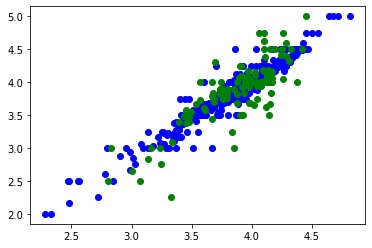

In [423]:
%matplotlib inline
import matplotlib.pyplot as plt

predicted_test = rf.predict(X_test)
predicted_train = rf.predict(X_train)

plt.plot(predicted_train,y_train, 'o', color='blue')
plt.plot(predicted_test,y_test, 'o', color='green')

In [434]:
# Create sqlite of importance of the words data
from sqlalchemy import create_engine
engine = create_engine('sqlite:///beer_project.sqlite', echo=False)
words = pd.DataFrame(sorted(zip(rf.feature_importances_, features), reverse=True))
words = words.rename(columns={0:'importance',1:'word'})
words.to_sql('words',con=engine)
words

,importance,word
0,0.016996,glass
1,0.013189,ipa
2,0.012985,brew
3,0.012332,head
4,0.012327,nice
...,...,...
95,0.001122,appear
96,0.001084,aroma
97,0.001025,smooth
98,0.000873,new


In [435]:
# Create sqlite of predicted and actual of training  data
model_train = pd.DataFrame({'predicted':predicted_train,'actual':y_train})

model_train.to_sql('model_train',con=engine)

model_train

,predicted,actual
0,3.997833,4.000000
1,3.708831,3.777778
2,4.265333,4.333333
3,4.230000,4.250000
4,4.266249,4.166667
...,...,...
451,3.607333,3.500000
452,4.004611,4.000000
453,4.244667,4.250000
454,3.504417,3.500000


In [436]:
# Create sqlite of predicted and actual of test data
model_test = pd.DataFrame({'predicted':predicted_test,'actual':y_test})

model_test.to_sql('model_test',con=engine)

model_test

,predicted,actual
0,3.785429,3.833333
1,4.085302,4.000000
2,3.496209,3.549296
3,4.449167,5.000000
4,3.969321,4.175000
...,...,...
109,4.282137,4.400000
110,3.933723,4.071429
111,3.004542,2.657895
112,3.852145,3.000000
